# Define the problem

**Process Management Problem**

In the process management problem, we are given a set of tasks represented by processes $p$. Each process $p_i$ has an associated value $v_i$​ (indicating its importance) and a duration $d_i$​ (representing the time required to execute the task). Additionally, there exists a maximum allowed duration $d_{max}$​ within which we must execute these tasks.


Our objective is to select a subset $S$ of processes from $p$ such that their total duration does not exceed $d_{max}$​, while maximizing the overall value of the executed processes. In other words, we aim to find the set S that maximizes the expression:

$$\sum_{i\in S} v_i$$

subject to the constraint:

$$\sum_{i\in S} d_i \leq d_{max}$$

## Define problem instance

In [4]:
import numpy as np
import random

random.seed(13)

# Define the number of items
n_items = 6

# Define ranges
duration_range = [1, 7]
values_range = [5, 15]
max_duration_percentage = 0.7

# Fill the weights and values 
duration = [random.randint(duration_range[0], duration_range[1]) for _ in range(n_items)]
values  = [random.randint(values_range[0], values_range[1]) for _ in range(n_items)]

# Compute the maximum allowed weight
max_duration = int(max_duration_percentage * sum(duration))

# Print the instance
print("-" * 20)
print("Instance Details:")
print("-" * 20)
print(f"Duration                 : {duration}")
print(f"Values                   : {values}")
print(f"Total duration           : {sum(duration)}")
print(f"Maximum allowed duration : {max_duration}")

--------------------
Instance Details:
--------------------
Duration                 : [3, 3, 6, 6, 7, 7]
Values                   : [7, 15, 8, 15, 7, 8]
Total duration           : 32
Maximum allowed duration : 22


Reference Solution (Selected Processes are **Bolded**):

Duration: [3, **3**, **6**, **6**, 7, **7**]

Values: [7, **15**, **8**, **15**, 7, **8**]

Total selected Duration: 22

Total selected values: 46

# Hackathon Tasks 


## Problem 1

### Build the cost hamiltonians for the Process Management problem:

Our cost Hamiltonian is

$$\hat{H} = -\sum v_i\frac{1-\hat{Z}_i}{2} + \left(d_{\text{max}} - \hat{x} - \sum d_i\frac{1-\hat{Z}_i}{2}\right)^2 $$

where

$$\hat{x} = \sum_{\text{ancillas}} 2^{i}\frac{1-\hat{Z}_i}{2}. $$

Every configuration that fulfills the duration constraint has an associated duration that might be smaller then $d_{\text{max}}$. The operator $\hat{x}$ acts on the ancillas and enables us to fill the gap between $\sum_{i\in S} d_i$ and $d_{\text{max}}$, thereby converting an inequality constraint into an equality constraint.

In [5]:
from qibo.symbols import Z, X
from qibo.hamiltonians import SymbolicHamiltonian

def build_cost_hamiltonian(values: list, duration: list, max_duration: int) -> SymbolicHamiltonian:
    """This function should be filled to build the problem cost hamiltonian.

    Args:
        values (list): the list of values.
        duration (list): the list of durations. 
        max_duration (int): the maximum value of the allowed duration.
        
    """
    nAncillas = int(np.ceil(np.log2(max_duration)))
    nQubits = len(values)

    cost_hamiltonian = (-1) * sum([values[i] * (1 - Z(i))/2 for i in range(nQubits)]) + (max_duration - sum([2**i * (1 - Z(nQubits + i))/2 for i in range(nAncillas)]) - sum([duration[i] * (1 - Z(i))/2 for i in range(nQubits)]))**2

    return SymbolicHamiltonian(cost_hamiltonian)

### Compute the number of qubits required to execute the cost hamiltonian

In [6]:
# define the number of qubits:

nqubits = len(values) + int(np.ceil(np.log2(max_duration))) # 6 task qubits + n_ancillas ancillas

### Diagonalize the cost hamiltonian and examine its eigenvalues and eigenvectors. 
- Show that the ground state eigenvector does actually correspond to the ground state energy of the problem. (Note: the ground state could be degenerate)

In [7]:
import numpy as np
from qibo import set_backend

# set the backend used for the calculation 
set_backend("numpy", platform=None)


# create the cost Hamiltonian for the given graph
cost_hamiltonian = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)

ham_matrix = cost_hamiltonian.matrix

eig_val, eig_vec = np.linalg.eig(ham_matrix)
eig_vec = ["{0:0{bits}b}".format(i.argmax(), bits=nqubits) for i in eig_vec]

vec = zip(eig_val, eig_vec)
diagonalized_solution = sorted(vec, key=lambda x: x[0])

print()

for sol in diagonalized_solution:
    dur_sol = sum([duration[i] for i in range(len(duration)) if sol[1][i]=="1"])
    val_sol = sum([values[i] for i in range(len(values)) if sol[1][i]=="1"])

    if dur_sol > max_duration:
        print("\033[93m",end="")
    else:
        print("\033[0m",end="")
    print(f"{sol[1]}, {sol[0]}:.02f, value = {val_sol}, duration = {dur_sol}")
    

[Qibo 0.2.2|INFO|2024-05-05 10:37:29]: Using numpy backend on /CPU:0
[Qibo 0.2.2|WARNING|2024-05-05 10:37:29]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.



01110100000, (-46+0j):.02f, value = 46, duration = 22
01110110000, (-45+0j):.02f, value = 46, duration = 22
01111000000, (-45+0j):.02f, value = 45, duration = 22
11010111000, (-45+0j):.02f, value = 45, duration = 19
11110000100, (-45+0j):.02f, value = 45, duration = 18
01011100000, (-44+0j):.02f, value = 45, duration = 23
01111010000, (-44+0j):.02f, value = 45, duration = 22
11010100100, (-44+0j):.02f, value = 45, duration = 19
11010101000, (-44+0j):.02f, value = 45, duration = 19
11011011000, (-44+0j):.02f, value = 44, duration = 19
11110010100, (-44+0j):.02f, value = 45, duration = 18
11110011000, (-44+0j):.02f, value = 45, duration = 18
11110100000, (-44+0j):.02f, value = 53, duration = 25
11011000100, (-43+0j):.02f, value = 44, duration = 19
11011001000, (-43+0j):.02f, value = 44, duration = 19
11111000000, (-43+0j):.02f, value = 52, duration = 25
01110101000, (-42+0j):.02f, value = 46, duration = 22
01011110000, (-41+0j):.02f, value = 45, duration = 23
01111001000, (-41+0j):.02f,

We see that the optimal solution `011101` does indeed have the lowest loss.

## Problem 2

### Given that we only have **6 qubits** to solve this problem. Reduce the hamiltonian to use **only 6 qubits**

There are two main approaches we have considered in the design of the hamiltonian in six qubits:

* Incorporate the constraint into the first six qubits in the form of a penalty term. We include a term $\hat{C}({d_i})$ in the Hamiltonian that raises the losses of configuration that excede the maximum workload. There are many different ways to do this, and each is a compromise between maximizing the value and minimizing the workload. The fact that $\hat{H}$ has to remain hermitian and that it must be implementable with a reasonable amount of gates limits the feasible Hamiltonians.
* Limit the states to a subspace in which the inequaliy constraint is automatically fulfilled. This means we keep the naive approach $\hat{H}=-\sum v_i\frac{1-\hat{Z}_i}{2}$ for the cost hamiltonian and modify the mixing hamiltonian instead: it should mix terms in the subspace $\mathcal{H}_0$ where the duration constraint is fulfilled while keeping the two subspaces separate. Doing this exactly requires the initial state to be in $\mathcal{H}_0$, too. A similar, non-exact approach is to map states from the non-fulfilling subspace $\mathcal{H}_1$ to the fulfilling subspace $\mathcal{H}_0$ with higher probability than vice versa. Since the mixing layer is executed many times; this will effectively limit us to the fulfilling subspace $\mathcal{H}_0$.

We settled on the first approach and add the penaly term

$$ \frac{1}{3}\left(\frac{4}{5}d_{\text{max}} - \sum d_i\frac{1-\hat{Z}_i}{2}\right)^2. $$

The factor $\frac{1}{3}$ is the result of a hyperparameter search, where we had to navigate the correct balance in the cost Hamiltonian between the value and the duration. The factor $\frac{4}{5}$ arose from entrepreneurial considerations: A conmpany would prefer, for economical reasons, to have high value with maximum acceptable workload, instead of less value for less workload, i.e. the workload is likely to be maximized in an economically ideal scenario. Centering the parabola in our loss function around $4d_{\text{max}}/5$ ensures that.

In [6]:
nqubits = 6

def build_cost_hamiltonian(values: list[int], duration: list[int], max_duration: int) -> SymbolicHamiltonian:
    """This function should be filled to build the problem cost hamiltonian.

    Args:
        values (list[int]): the list of values.
        duration (list[int]): the list of durations. 
        max_duration (int): the maximum value of the allowed duration.
        
    """

    cost_hamiltonian = - sum([values[i] * (1-Z(i))/2 for i in range(len(values))]) + (1/3)*((4/5)*max_duration - sum([duration[i] * (1-Z(i))/2 for i in range(len(duration))]))**2
 
    return SymbolicHamiltonian(cost_hamiltonian)

### Solve this hamiltonian using the QAOA algorithm. 

        step 1. Define the Mixing hamiltonian.

In [7]:
def build_mixer_hamiltonian(nqubits: int) -> SymbolicHamiltonian:
    '''
    build the mixer hamiltonian for the given graph.

    args:
        graph: graph
            A network graph

    returns:
        The mixer hamiltonian of the given graph

    '''
    mixing_hamiltonian = sum([ X(i) for i in range(nqubits)]) # TODO: define the Mixing Hamiltonian 
    
    return SymbolicHamiltonian(mixing_hamiltonian)

        Step 2. Run the QAOA algorithm.

In [8]:
from qibo import models

hamiltonian = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)
mixer_hamiltonian = build_mixer_hamiltonian(nqubits)

# create QAOA model given the Hamiltonians
qaoa = models.QAOA(hamiltonian=hamiltonian, mixer=mixer_hamiltonian)

# optimize using random initial variational parameters with four layers 
n_layers = 5
# initial_parameters = 0.01 * np.random.random(n_layers * 2)
initial_parameters =  0.01 *  (2 * np.random.random(n_layers * 2) - 1) * np.pi
print(initial_parameters)

# run the QAOA optimization with the initial parameters and the hamiltonians defined 

# Define random initial variational parameters with four layers 
n_layers = 4
initial_parameters = 0.01 * np.random.random(n_layers * 2)


"""
supported optimization Method: 
- Nelder-Mead 
- parallel_L-BFGS-B
- Powell
- CG
- cma
- sgd
- L-BFGS-B
- Newton-CG
- COBYLA
- BFGS
- trust-constr
"""
method = "Powell"


best_energy, final_parameters, _ = qaoa.minimize(initial_parameters, method=method)

print("best energy: ", best_energy)

[-0.01350822 -0.01544663  0.00813086 -0.00566357  0.01614785  0.02074924
 -0.02368127 -0.00280656 -0.01806757 -0.00783715]
best energy:  -31.677820361241544


    Step 3. Display solution and compare it to the ground state you obtained in problem 1

In [9]:
qaoa.set_parameters(final_parameters)
quantum_state = qaoa.execute(None)

probabilities = (np.abs(quantum_state) ** 2)
probabilities = zip(probabilities, [i for i in range(len(probabilities))])
probabilities = sorted(probabilities, key=lambda x: x[0], reverse=True)
probabilities = [("{:.2f} %".format(round(p*100, 4)), "{0:0{bits}b}".format(s, bits=nqubits)) for p, s in probabilities]
print(probabilities)
qaoa_solution = probabilities[0][1]
print("-"*10)

print("The best solution is:", qaoa_solution )

[('6.63 %', '011110'), ('5.31 %', '011101'), ('4.83 %', '110101'), ('4.29 %', '111100'), ('4.27 %', '110110'), ('4.18 %', '111001'), ('3.71 %', '010101'), ('3.67 %', '010110'), ('3.50 %', '111110'), ('3.44 %', '101110'), ('3.36 %', '111010'), ('3.04 %', '011001'), ('2.88 %', '110011'), ('2.82 %', '101101'), ('2.72 %', '111101'), ('2.65 %', '010011'), ('2.63 %', '011010'), ('2.51 %', '100011'), ('2.31 %', '101100'), ('2.30 %', '011100'), ('2.27 %', '001101'), ('2.20 %', '100110'), ('1.97 %', '010111'), ('1.85 %', '011011'), ('1.63 %', '101010'), ('1.53 %', '110001'), ('1.51 %', '000111'), ('1.50 %', '100101'), ('1.47 %', '001110'), ('1.25 %', '101001'), ('1.20 %', '100111'), ('1.16 %', '001011'), ('1.12 %', '000101'), ('0.95 %', '101011'), ('0.93 %', '001001'), ('0.66 %', '110111'), ('0.63 %', '111011'), ('0.55 %', '011111'), ('0.51 %', '000011'), ('0.51 %', '001111'), ('0.36 %', '111111'), ('0.31 %', '101000'), ('0.29 %', '110010'), ('0.28 %', '110100'), ('0.26 %', '010000'), ('0.25 %'

This solution is not the optimal one; we see that QAOA is limited.

### Solve this hamiltonian using Quantum Adiabatic Evolution

        Setp 1. Define initial hamiltonian

In [10]:
def build_initial_hamiltonian(nqubits: int) -> SymbolicHamiltonian:
    '''
    build the mixer hamiltonian for the given graph.

    args:
        graph: graph
            A network graph

    returns:
        The mixer hamiltonian of the given graph

    '''
    mixing_hamiltonian = sum([X(i) for i in range(nqubits)]) # TODO: define the Mixing Hamiltonian 
    
    return SymbolicHamiltonian(mixing_hamiltonian)

    Step 2. Run the Adiabatic Evolution

In [11]:
import numpy as np
from qibo.models.evolution import AdiabaticEvolution
from qibo.hamiltonians.hamiltonians import Hamiltonian


# build initial (H0) and target (H1) hamiltonians
H0 = build_initial_hamiltonian(nqubits=nqubits)
H1 = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)

# calculate the dense hamiltonian from the symbolic hamiltonian
H1_dense = Hamiltonian(nqubits, H1.calculate_dense().matrix)
H0_dense = Hamiltonian(nqubits, H0.calculate_dense().matrix)

# Define the time steps
dt = 0.1

# Define the final evolution time
T = 20

# define the schedule. This is a function of time that defines the scheduling of the adiabatic evolution. 
# Can be either a function of time s(t) or a function with two arguments s(t, p) 
# where p corresponds to a vector of parameters to be optimized.
def s(t): return t

# construct the adiabatic model
adiabatic_model = AdiabaticEvolution(H0_dense, H1_dense, s, dt)

# execute the adiabatic optimization
adiabatic_quantum_state = adiabatic_model.execute(final_time=T)

    Step 3. Display solution and compare it to the ground state you obtained in problem 1 and using QAOA

In [12]:
# obtain the state with the highest probability
solution_dec  = (np.abs(adiabatic_quantum_state) ** 2).argmax()
adiabatic_solution = "{0:0{bits}b}".format(solution_dec, bits=nqubits)


print("the solution is: ", adiabatic_solution)

the solution is:  111100


### What are the downsides to the method you used to reduce the number of qubits? 

Since we cannot use ancilla qubits but still need as many qubits as there are values, we have to incorporate the duration constraint in the cost Hamiltonian in form of a penalty term. This means that there is a conflict between maximizing the value and keeping the duration at or below the maximum duration $d_{\text{mx}}$. Every cost Hamiltonian we could write down represents a consciously chosen compromise between these two opposing tendencies. Above, we go into detail what the reasoning behind our current Hamiltonian is.

In princple, every analytical function can be approximated as a power series and could thus be used as a penalty function. In order to keep our Hamiltonian as simple as possible, thereby making it easier to implement on hardware, we limited ourselves to second order terms in the operators.

## Problem 3

### Given this new dataset generate a hamiltonian that only uses 3 qubits 

In [9]:
import random 


random.seed(13)

# Define the number of items
n_items = 3

# Define ranges
max_duration_percentage = 0.7

# Fill the weights and values 
values   = [6, 2, 6]
duration = [3, 3, 6]

# Compute the maximum allowed weight
max_duration = int(max_duration_percentage * sum(duration))



# Print the instance
print("-" * 20)
print("Instance Details:")
print("-" * 20)
print(f"Duration                 : {duration}")
print(f"Values                   : {values}")
print(f"Total duration           : {sum(duration)}")
print(f"Maximum allowed duration : {max_duration}")

--------------------
Instance Details:
--------------------
Duration                 : [3, 3, 6]
Values                   : [6, 2, 6]
Total duration           : 12
Maximum allowed duration : 8


### Design a circuit layout that is suitable for this Hamiltonian

    Step 1. Create each element of the circuit

Your qubits will have a critical current of 230nA, shunting capacitance of 50fF, Z loop capacitance of 4.4fF, inductance of 480pH, x to z loop current ration of 0.4 and junction assymetry of 0.

The coupler's parameters are given

In [10]:
import cas as cas

# coupler parameters
i_sigma = 565
c_sigma = 11
lc = 580
d = 0.0
# qubit parameters
i_c = 230
c_shunt = 50
c_z = 4.4
lq = 480
alpha = 0.4
d = 0.0

# define couplers and qubits


coupler01 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler12 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler20 = cas.Coupler(i_sigma, c_sigma, lc, d)

qubit0 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit1 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit2 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)

circuit_elements = [qubit0, coupler01, qubit1, coupler12, qubit2, coupler20]

C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


    Step 2. Define the qubit-coupler interaction and create the circuit object

A good approximation is to consider only the first 5 energy levels of the qubit and the first 2 energy levels of the coupler

In [11]:
m = 65; m_mat = np.zeros((6, 6)) # mutual inductance matrix (given)

m_mat[0, 1] = -m; m_mat[1, 2] = m
m_mat[2, 3] = -m; m_mat[3, 4] = m
m_mat[4, 5] = -m; m_mat[5, 0] = m

m_mat = -(m_mat + m_mat.T)

trunc_vec = np.array([5, 2, 5, 2, 5, 2]) # truncation vector for the energies of each element
circuit = cas.AnnealingCircuit(circuit_elements, m_mat, trunc_vec)

### Design an annealing Ising schedule 

    Step 1. Define the starting (initial) and objective hamiltonian coefficients

In [33]:
# initialization hamiltonian
h0 = {} # type: dict[str, np.ndarray]
# H_0 = sum([X(i) for i in range(nqubits])
h0["x_0"] = 0
h0["x_1"] = 0
h0["x_2"] = 0

h0["z_0"] = 1
h0["z_1"] = 0.9
h0["z_2"] = 0.8

h0["zz_0,1"] = 0
h0["zz_1,2"] = 0
h0["zz_2,0"] = 0

# objective hamiltonian
hf = {} # type: dict[str, np.ndarray]
# H_C = sum([ values[i] * (Z(i)-1)/2 for i in range(nqubits])
hf["x_0"] = 0
hf["x_1"] = 0
hf["x_2"] = 0

hf["z_0"] = values[0]/2 - (4/5)*max_duration*duration[0] + duration[0]/4
hf["z_1"] = values[1]/2 - (4/5)*max_duration*duration[1] + duration[1]/4
hf["z_2"] = values[2]/2 - (4/5)*max_duration*duration[2] + duration[2]/4

hf["zz_0,1"] = (duration[0]*duration[1])/4
hf["zz_1,2"] = (duration[1]*duration[2])/4
hf["zz_2,0"] = (duration[2]*duration[0])/4

    Step 2. Create a method to get a an arbitrary schedule for the circuit designed above

In [34]:
def get_schedule(h0: dict[str, np.ndarray], hf: dict[str, np.ndarray], points: int, schedule: callable) -> dict[str, int | np.ndarray]:
    """Given the ising coefficients for the initial and final hamiltonian of the annealing schedule,
    and given some time dependance of the schedule (eg. linear, exponential, etc), returns the ising
    coefficients for x and z at each time step.

    args:
        h0 (dict[str, np.ndarray]): ising coefficients of the starting hamiltonian h0
        hf (dict[str, np.ndarray]): ising coefficients of the target (final) hamiltonian hf
        points (int): number of points in the annealing schedule
        schedule (callable): time dependance of the schedule
    
    returns:
        dict[str, np.ndarray]: Dictionary of ising coefficients at each step of the schedule
    """

    ising_dict = {}
    s = np.linspace(0, 1, points)
    ising_dict["points"] = points
    
    ising_dict["x_0"] = schedule(h0["x_0"], hf["x_0"], points)*2*np.pi
    ising_dict["x_1"] = schedule(h0["x_1"], hf["x_1"], points)*2*np.pi
    ising_dict["x_2"] = schedule(h0["x_2"], hf["x_2"], points)*2*np.pi
    
    ising_dict["z_0"] = schedule(h0["z_0"], hf["z_0"], points)*2*np.pi
    ising_dict["z_1"] = schedule(h0["z_1"], hf["z_1"], points)*2*np.pi
    ising_dict["z_2"] = schedule(h0["z_2"], hf["z_2"], points)*2*np.pi
    
    ising_dict["zz_0,1"] = schedule(h0["zz_0,1"], hf["zz_0,1"], points)*2*np.pi
    ising_dict["zz_1,2"] = schedule(h0["zz_1,2"], hf["zz_1,2"], points)*2*np.pi
    ising_dict["zz_0,2"] = schedule(h0["zz_2,0"], hf["zz_2,0"], points)*2*np.pi
    
    return ising_dict



    Step 2. Get the ising coefficients for a linear and an exponential schedule for a resolution of 1ns

In [35]:
# linear schedule
linear_schedule = lambda xi, xf, n: np.array([xi + i * ((xf-xi)/(n-1)) for i in range(n)])
ising_linear = get_schedule(h0, hf, points=10, schedule=linear_schedule)

# exponential schedule
def exponential_schedule(xi, xf, n):
    if xi<xf:
        return np.array([ xi + np.exp((i/n)*np.log(xf-xi+1))-1 for i in range(n)])
    if xi==xf:
        return np.array([ xi for i in range(n)])
    if xf<xi:
        return np.array([ xi - np.exp((i/n)*np.log(xi-xf+1))+1 for i in range(n)])
ising_exponential = get_schedule(h0, hf, points=10, schedule=exponential_schedule)

    Step 3. Calculate the flux schedule for the exponential schedule

In [36]:
def get_fluxes(ising_schedule: dict[str, int | np.ndarray], optimizer: str) ->  dict[str, int | np.ndarray]:
    """Get the flux schedule from a given ising schedule.

    Args:
        ising_schedule (dict[str, int  |  np.ndarray]): dictionary with the number of points in the schedule
            and the ising coefficients for each control of the circuit at each point of the schedule
        optimizer (str): name of the lmfit minimizer to use

    Returns:
        dict[str, int | np.ndarray]: dictionary containing the number of points in the schedule and the fluxes
            to be applied at each control of the circuit at each point of the schedule.
    """
    
    flux_dict = circuit.get_custom_fluxes_pwsw(ising_schedule, verbose=True, optimizer_method=optimizer)
    return flux_dict
    

### With the obtain fluxes calculate the energy spectrum of the circuit

    Step 1. Define a function to get the spectrum from the flux schedule using the code from CAS

In [37]:
def get_schedule_spectrum(flux_dict: dict[str, int | np.ndarray], levels: int) -> np.ndarray:
    """Calculate the energy spectrum through the schedule. The more levels we try to calculate,
    the more computationally expensive this will be.

    Args:
        flux_dict (dict[str, int  |  np.ndarray]): dictionary containing the number of points in the schedule and the fluxes
            to be applied at each control of the circuit at each point of the schedule.
        levels (int): energy levels to compute

    Returns:
        np.ndarray: of size (schedule points, levels) with the energy gaps for each level (En - E0),
            where E0 is the ground state energy and En is the energy of level n.
    """
    energy = circuit.calculate_spectrum(flux_dict, levels) 
    for i in range(levels):
        energy[:,i] -= energy[:,0]
    return energy
    

In [31]:
# eig_val, eig_vec = np.linalg.eig(SymbolicHamiltonian(sum([X(i) for i in range(3)])).matrix)
# eig_vec = ["{0:0{bits}b}".format(i.argmax(), bits=3) for i in eig_vec]

# vec = zip(eig_val, eig_vec)
# diagonalized_solution = sorted(vec, key=lambda x: x[0])
# diagonalized_solution

In [38]:
schedule_spectrum = get_schedule_spectrum(get_fluxes(ising_exponential, "leastsq"), 5)

calculating qubit biases for qubit 1 of 3
point #0 single qubit residuals: 
 [-9.39699025e-02  6.79441813e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #0, solver found solutions that are not optimal. The relative error is 1.50 % for single qubit residuals
  warnings.warn(


point #1 single qubit residuals: 
 [-9.27326288e-02  4.36213900e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #1, solver found solutions that are not optimal. The relative error is 2.21 % for single qubit residuals
  warnings.warn(


point #2 single qubit residuals: 
 [-9.18675444e-02  1.46206996e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #2, solver found solutions that are not optimal. The relative error is 6.40 % for single qubit residuals
  warnings.warn(


point #3 single qubit residuals: 
 [-9.20324631e-02 -2.28735273e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #3, solver found solutions that are not optimal. The relative error is 4.09 % for single qubit residuals
  warnings.warn(


point #4 single qubit residuals: 
 [-9.46472175e-02 -7.90582920e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #4, solver found solutions that are not optimal. The relative error is 1.32 % for single qubit residuals
  warnings.warn(


point #6 single qubit residuals: 
 [-0.10611903 -7.34093089] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #6, solver found solutions that are not optimal. The relative error is 32.82 % for single qubit residuals
  warnings.warn(


point #7 single qubit residuals: 
 [ -0.10611903 -18.90447877] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #7, solver found solutions that are not optimal. The relative error is 55.71 % for single qubit residuals
  warnings.warn(


point #8 single qubit residuals: 
 [ -0.10611903 -34.29561372] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #8, solver found solutions that are not optimal. The relative error is 69.53 % for single qubit residuals
  warnings.warn(


point #9 single qubit residuals: 
 [ -0.10611903 -54.78128451] 

calculating qubit biases for qubit 2 of 3


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #9, solver found solutions that are not optimal. The relative error is 78.47 % for single qubit residuals
  warnings.warn(


point #0 single qubit residuals: 
 [-9.35405496e-02  6.02758757e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #0, solver found solutions that are not optimal. The relative error is 1.65 % for single qubit residuals
  warnings.warn(


point #1 single qubit residuals: 
 [-9.24258346e-02  3.58289850e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #1, solver found solutions that are not optimal. The relative error is 2.65 % for single qubit residuals
  warnings.warn(


point #2 single qubit residuals: 
 [-9.17726885e-02  5.87484520e-06] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #2, solver found solutions that are not optimal. The relative error is 15.98 % for single qubit residuals
  warnings.warn(


point #3 single qubit residuals: 
 [-9.23711343e-02 -3.47051474e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #3, solver found solutions that are not optimal. The relative error is 2.76 % for single qubit residuals
  warnings.warn(


point #4 single qubit residuals: 
 [-9.60114438e-02 -9.94419075e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #4, solver found solutions that are not optimal. The relative error is 1.11 % for single qubit residuals
  warnings.warn(


point #5 single qubit residuals: 
 [-0.10611903 -0.6734151 ] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #5, solver found solutions that are not optimal. The relative error is 4.34 % for single qubit residuals
  warnings.warn(


point #6 single qubit residuals: 
 [ -0.10611903 -10.20418879] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #6, solver found solutions that are not optimal. The relative error is 40.44 % for single qubit residuals
  warnings.warn(


point #7 single qubit residuals: 
 [ -0.10611903 -23.02148009] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #7, solver found solutions that are not optimal. The relative error is 60.51 % for single qubit residuals
  warnings.warn(


point #8 single qubit residuals: 
 [ -0.10611903 -40.25858605] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #8, solver found solutions that are not optimal. The relative error is 72.82 % for single qubit residuals
  warnings.warn(


point #9 single qubit residuals: 
 [ -0.10611903 -63.43960107] 

calculating qubit biases for qubit 3 of 3


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #9, solver found solutions that are not optimal. The relative error is 80.85 % for single qubit residuals
  warnings.warn(


point #0 single qubit residuals: 
 [-9.31598056e-02  5.33888179e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #0, solver found solutions that are not optimal. The relative error is 1.85 % for single qubit residuals
  warnings.warn(


point #1 single qubit residuals: 
 [-9.20518788e-02  2.36093549e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #1, solver found solutions that are not optimal. The relative error is 3.96 % for single qubit residuals
  warnings.warn(


point #2 single qubit residuals: 
 [-9.18837528e-02 -1.55269095e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #2, solver found solutions that are not optimal. The relative error is 5.99 % for single qubit residuals
  warnings.warn(


point #3 single qubit residuals: 
 [-9.45656787e-02 -7.77446890e-05] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #3, solver found solutions that are not optimal. The relative error is 1.34 % for single qubit residuals
  warnings.warn(


point #5 single qubit residuals: 
 [ -0.10611903 -11.20456277] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #5, solver found solutions that are not optimal. The relative error is 42.72 % for single qubit residuals
  warnings.warn(


point #6 single qubit residuals: 
 [ -0.10611903 -27.33893999] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #6, solver found solutions that are not optimal. The relative error is 64.53 % for single qubit residuals
  warnings.warn(


point #7 single qubit residuals: 
 [ -0.10611903 -50.40742258] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #7, solver found solutions that are not optimal. The relative error is 77.03 % for single qubit residuals
  warnings.warn(


point #8 single qubit residuals: 
 [ -0.10611903 -83.39009561] 



C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #8, solver found solutions that are not optimal. The relative error is 84.73 % for single qubit residuals
  warnings.warn(


point #9 single qubit residuals: 
 [-1.06119030e-01 -1.30547802e+02] 


 calculating coupler bias for coupler 1 of 3


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\elements.py:617: UserWarning: For the point #9, solver found solutions that are not optimal. The relative error is 89.68 % for single qubit residuals
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 1 can not provide the required coupling strength of 1.57 GHz for point 8 in schedule. Using maximum available strength instead.
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 1 can not provide the required coupling strength of 1.89 GHz for point 9 in schedule. Using maximum available strength instead.
  warnings.warn(



 calculating coupler bias for coupler 2 of 3


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 2 can not provide the required coupling strength of 1.35 GHz for point 5 in schedule. Using maximum available strength instead.
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 2 can not provide the required coupling strength of 1.78 GHz for point 6 in schedule. Using maximum available strength instead.
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 2 can not provide the required coupling strength of 2.30 GHz for point 7 in schedule. Using maximum available strength instead.
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 2 can not provide the required coupling strength of 2.91 GHz for point 8 in schedule. Using maximum available strength instead.
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 2 can not provide the required coupling strength of 3.64 GHz for point 9 in schedule. Using maximum available strength instead.
  warnings.warn(



 calculating coupler bias for coupler 3 of 3


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 3 can not provide the required coupling strength of 1.35 GHz for point 5 in schedule. Using maximum available strength instead.
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 3 can not provide the required coupling strength of 1.78 GHz for point 6 in schedule. Using maximum available strength instead.
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 3 can not provide the required coupling strength of 2.30 GHz for point 7 in schedule. Using maximum available strength instead.
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 3 can not provide the required coupling strength of 2.91 GHz for point 8 in schedule. Using maximum available strength instead.
  warnings.warn(


C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\cas\circuit.py:1672: UserWarning: Coupler 3 can not provide the required coupling strength of 3.64 GHz for point 9 in schedule. Using maximum available strength instead.
  warnings.warn(


In [ ]:
schedule_spectrum

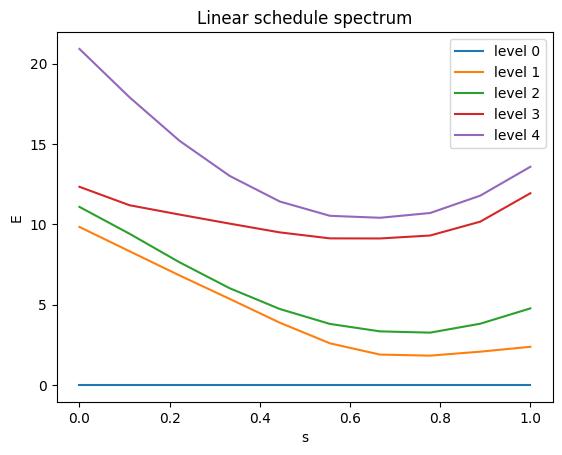

In [20]:
from matplotlib import pyplot as plt

# Plot schedule spectrum
for i in range(schedule_spectrum.shape[1]):
    plt.plot(linear_schedule(0,1,20), schedule_spectrum[:,i], label=f"level {i}")
    
plt.title("Linear schedule spectrum")
plt.xlabel("s")
plt.ylabel("E")
plt.legend()

In [ ]:
# Zoomed in plot of the avoided crossing
plt.ylim([8.25,8.45])
plt.xlim([0.45, 0.55])
for i in range(schedule_spectrum.shape[1]):
    plt.plot(linear_schedule(0,1,100), schedule_spectrum[:,i], label=f"level {i}")
plt.title("Linear schedule spectrum")
plt.xlabel("s")
plt.ylabel("E")
plt.legend()

Comment:
- We observe an avoided crossing between the second and third levels (which can be used for building CPHASE gates). 

Let us now plot the spectrum when using an exponential schedule

In [ ]:
schedule_spectrum = get_schedule_spectrum(get_fluxes(ising_exponential, "leastsq"), 4)

In [ ]:
# Plot schedule spectrum
for i in range(schedule_spectrum.shape[1]):
    plt.plot(exponential_schedule(0,1,100), schedule_spectrum[:,i], label=f"level {i}")
    
plt.title("Exponential schedule spectrum")
plt.xlabel("s")
plt.ylabel("E")
plt.legend()

### Research questions

1. For the annealing schedules calculated, do any of the resulting spectral schedules fulfill the adiabatic theorem?
2. By this point you will have obtained two energies, one from the software challenge (QAOA) and one from the annealing schedule above. Argue their relation.
3.  If you have made it here, you have problaly seen the difficulties of solving small instances. Can you propose ways to scale these procedures to more qubits? Some techniques for finding the gap along the annealing process can be found in [1], [2], [3] and [4]. Can you implement a simulation from one of these papers? Research and propose better techniques to find the flux schedule for a given Ising schedule with a greater amount of qubits.  

Answers:
1. The linear annealing schedule fulfills the adiabatic theorem, we have a gradually changing hamiltonian, allowing for the system to adapt its configuration and forcing preservation of eigenstates of the Hamiltonian. Thus, the eigenstates of the initial Hamiltonian will end in corresponding states of the final Hamiltonian, this we can observe by the presence of an avoidant crossing between the 2nd and 3rd levels.

## Bibliography

[1] Adiabatic Spectroscopy and a Variational Quantum Adiabatic Algorithm: https://arxiv.org/abs/2103.01226

[2] Direct estimation of the energy gap between the ground state and excited state with quantum annealing: https://arxiv.org/abs/2007.10561

[3] Simulating quantum circuits by adiabatic computation: improved spectral gap bounds: https://arxiv.org/abs/1906.05233

[4] Spectroscopy on two coupled flux qubits: https://arxiv.org/abs/cond-mat/0308192

